<a href="https://colab.research.google.com/github/Alexandre77777/data_mining/blob/main/4.%20%D0%A0%D0%B5%D1%88%D0%B0%D1%8E%D1%89%D0%B8%D0%B5%20%D0%B4%D0%B5%D1%80%D0%B5%D0%B2%D1%8C%D1%8F/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B0/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F%20%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0%20%E2%84%967.%20%D0%A0%D0%B5%D1%88%D0%B0%D1%8E%D1%89%D0%B8%D0%B5_%D0%B4%D0%B5%D1%80%D0%B5%D0%B2%D1%8C%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *0. Ознакомиться с [блокнотом](https://colab.research.google.com/drive/1PwN8igT5w2xArBGmM6rvO9pVRQMh-FQn?usp=sharing)

# 1. Дерево решений для классификации

In [1]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

### Получение данных

Будем работать с набором данных для задачи классификации - данные по сердечно сосудистым заболеваниям, довольно стандартный набор для изучения машинного обучения, но его нет в `sklearn'e`. Поэтому скачиваем данные со стороны, с google диска.

Ссылка на google drive: https://drive.google.com/file/d/1Si4EJ_RexI3Q7yZU8eLjgp4ORe_BXr4G


In [ ]:
!wget 'https://drive.google.com/uc?export=download&id=1Si4EJ_RexI3Q7yZU8eLjgp4ORe_BXr4G' -O cardio.csv

В задаче предалагается предсказать наличие сердечно-сосудистых заболеваний по результатам классического врачебного осмотра. Датасет сформирован 3 групп признаков:

Объективные признаки:
- Возраст (в днях)
- Рост
- Вес
- Пол

Результаты измерения:

- Артериальное давление верхнее и нижнее
- Холестерин (три группы: норма, выше нормы, значительно выше нормы)
- Глюкоза (три группы: норма, выше нормы, значительно выше нормы)

Субъективные признаки (бинарные):

- Курение
- Употребление Алкоголя
- Физическая активность

In [2]:
import pandas as pd
df = pd.read_csv('cardio.csv', delimiter=';')
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [3]:
full_features = ['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
                 'cholesterol', 'gluc', 'smoke', 'alco', 'active']
target = 'cardio'

In [4]:
df['age'] = round(df['age'] / 365)

## 1. Вводная

### 1.1 Сколько вопросов будет задано на первом этапе

Посчитайте, сколько вопросов задаст дерево решений в самый первый раз, если использовать все признаки из списка full_features.

In [5]:
X = df[full_features]   
Y = df[target]

In [6]:
from sklearn.tree import DecisionTreeClassifier


tree_classifier = DecisionTreeClassifier(random_state=13)
tree_classifier.fit(X, Y)
tree_classifier.tree_.node_count

46473

### 1.2 Упростите задачу

Вопросов получилось достаточно, не будет моделировать столько вопросов, а попробуем уменьшить их количество.

Возьмите только два признака: weight и gluc.
А так же возьмите только 10 первых объектов.

In [7]:
X = df[['weight', 'gluc']].head(10)   
Y = df[target].head(10)   


### 1.3 Посчитайте еще раз, сколько будет вопросов

In [8]:
tree = DecisionTreeClassifier(random_state=13)
tree.fit(X, Y)
tree.tree_.node_count

11

С таким количеством вопросов уже можем работать и разбираться в устройству дерева решений.

## 2. Устройство дерева решений

### 2.1 Обучите дерево решений

Обучите дерево решений из sklearn'a с атрибутом `random_state=1`.

In [9]:
tree = DecisionTreeClassifier(random_state=1)
tree.fit(X, Y)

DecisionTreeClassifier(random_state=1)

### 2.2 Отрисуйте обученное дерево решений

Нарисуйте дерево решений, которое у вас получилось после обучения. Сделайте отрисовку такой, чтобы можно было понять, какие вопросы задаются

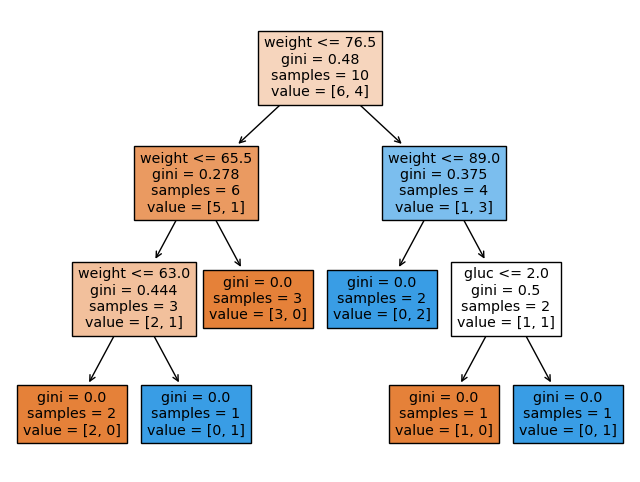

In [10]:
from sklearn.tree import plot_tree


plt.figure(figsize=(8, 6))
plot_tree(tree, feature_names=['weight', 'gluc'], filled=True);


### 2.3 Посчитайте, сколько вершин получилось

In [11]:
tree.tree_.node_count

11

### 2.4 Посчитайте, сколько листов получилось

In [12]:
tree.get_n_leaves()

6

### 2.5 Посмотрите, почему не получилось сделать разбиение ещё на два узла в крайнем левом узле.

В узле, где
```
gini=0.5
samples=2
value=[1, 1]
```

In [13]:
from sklearn.metrics import accuracy_score

X_left = df[['weight', 'gluc']].iloc[10:]
y_left = df[target].iloc[10:]  

y_pred_remaining = tree.predict(X_left)

accuracy_score(y_left, y_pred_remaining)


0.527203886269467

## 3. Вспомогательные функции

Для того, что бы дальше сравнивать между собой объекты нужно реализовать две вспомогательные функции.

### 3.1 Функция подсчета критерия Джини

Функция должна принимать список целевых значений, считать критерий информативности и выдавать одно значение - критерий Джини.

In [14]:
import numpy as np

def gini(targets):
    if len(targets) == 0:
        return 0

    _, class_counts = np.unique(targets, return_counts=True)
    class_probabilities = class_counts / len(targets)

    gini = 1.0 - np.sum(class_probabilities ** 2)

    return gini

### 3.2 Проверка функции gini

Посчитайте критерий информативности в исходной выборке и вы должны получить точно такое же значение, как и было на визуализации дерева решений в его корне.

In [15]:
gini(Y)


0.48

### 3.3 Функция подсчета прироста информации

Функция должна принимать целевые значения левой подвыборки, правой подвыборки и исходной вершины, а выдавать должна одно значение - прирост информации, подсчитанный на критерии информативности Джини.

In [16]:
def gain(left_labels, right_labels, root_labels):
    original_gini = gini(root_labels)

    left_weight = len(left_labels) / (len(left_labels) + len(right_labels))
    right_weight = len(right_labels) / (len(left_labels) + len(right_labels))
    weighted_gini = (left_weight * gini(left_labels)) + (right_weight * gini(right_labels))

    gain = original_gini - weighted_gini

    return gain

Теперь вспомогательные функции готовы можем моделировать работу обученного дерева решений.

## 4. Процесс построения дерева решений

### 4.1 Получение первого вопроса


4.1.1 Пройдитесь по всем возможным вопросам для исходного набора данных


Можете сохранять полученные значения прироста информации в датафрейм в удобную для вас структуру данных.

In [17]:
import pandas as pd
import numpy as np

IG = pd.DataFrame(columns=['feature', 'split value', 'information gain'])

original_target = df[target].values

for feature in full_features:
    unique_values = df[feature].unique()
    

    for value in unique_values:
        left_indices = df[feature] <= value
        right_indices = df[feature] > value
        
        left_target = original_target[left_indices]
        right_target = original_target[right_indices]
        ig  = gain(left_target, right_target, original_target)
        
        result_df = pd.DataFrame({'feature': [feature], 'split value': [value], 'information gain': [ig]})
        
        IG = pd.concat([IG, result_df], ignore_index=True)


4.1.2 Найдите самый лучший вопрос, опираясь на прирост информации

In [18]:
best_question = IG.sort_values(by='information gain', ascending=False).head(1)
best_question


,feature,split value,information gain
494,ap_hi,129.0,0.094549


4.1.3. Сделайте разбиение по этому вопросу исходных данных на две подвыборки df_left и df_right


In [19]:
best_feature = best_question['feature'].values[0]
split_value = best_question['split value'].values[0]

df_left = df[df[best_feature] <= split_value]
df_right = df[df[best_feature] > split_value]

4.1.4. Проверьте себя через визуализацию дерева решений

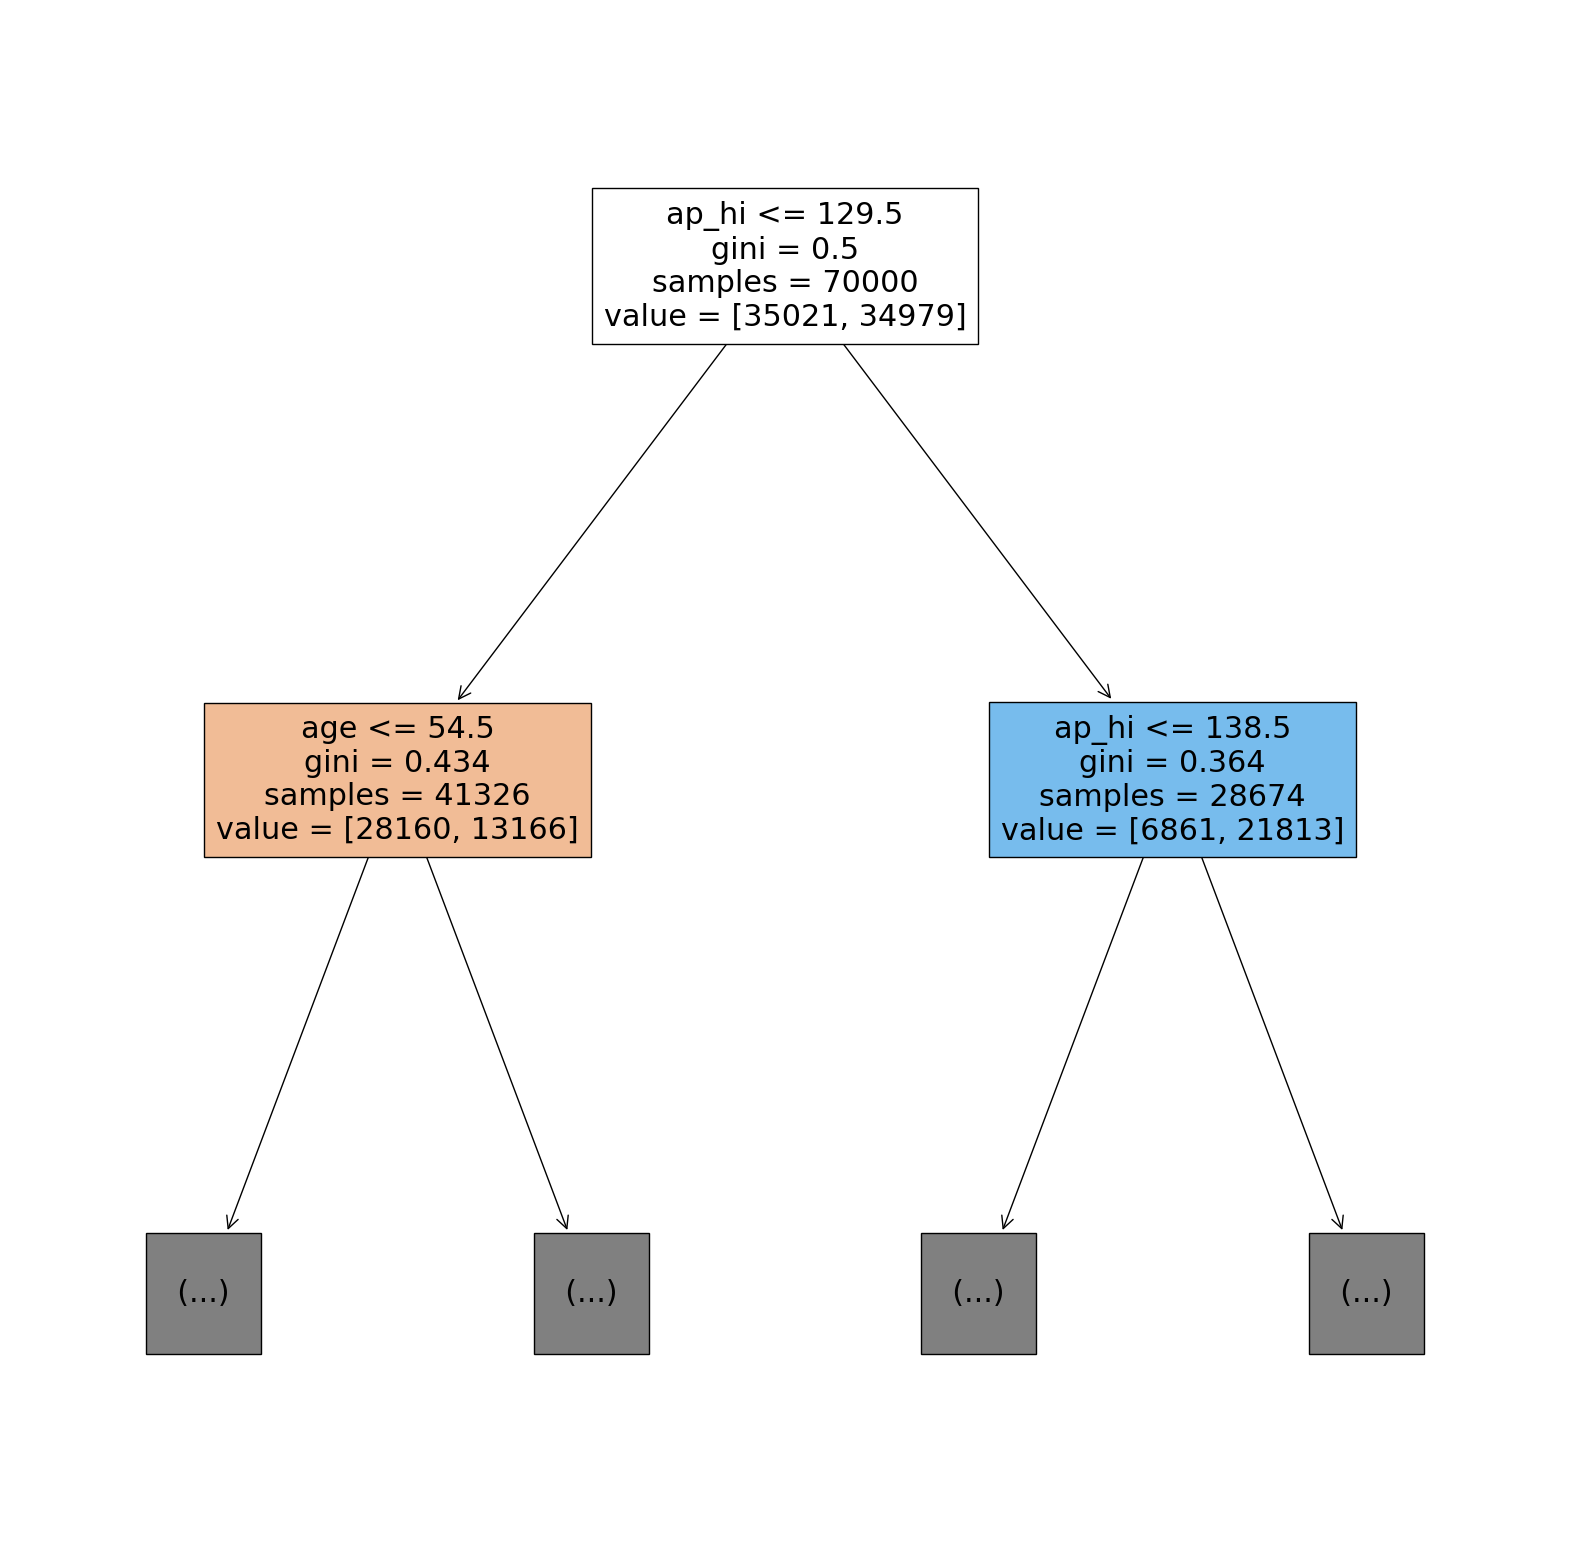

In [20]:
from sklearn.tree import plot_tree


plt.figure(figsize=(20, 20))
plot_tree(tree_classifier, feature_names=full_features, max_depth=1, filled=True)
plt.show()

### 4.2 Получение второго вопроса


4.2.1. Глядя на df_left и df_right, посмотрите, где можно сделать ещё разбиение

age для df_left, ap_hi для df_right

4.2.2. Пройдитесь по всем признакам в выбранной подвыборке

In [21]:
# Левый
IG_left = pd.DataFrame(columns=['feature', 'split value', 'information gain'])

original_target = df_left[target].values

for feature in full_features:
    unique_values = df_left[feature].unique()
    

    for value in unique_values:
        left_indices = df_left[feature] <= value
        right_indices = df_left[feature] > value
        
        left_target = original_target[left_indices]
        right_target = original_target[right_indices]
        ig  = gain(left_target, right_target, original_target)
        
        result_df = pd.DataFrame({'feature': [feature], 'split value': [value], 'information gain': [ig]})
        
        IG_left = pd.concat([IG_left, result_df], ignore_index=True)

In [22]:
# Правый
IG_right = pd.DataFrame(columns=['feature', 'split value', 'information gain'])

original_target = df_right[target].values

for feature in full_features:
    unique_values = df_right[feature].unique()
    

    for value in unique_values:
        left_indices = df_right[feature] <= value
        right_indices = df_right[feature] > value
        
        left_target = original_target[left_indices]
        right_target = original_target[right_indices]
        ig  = gain(left_target, right_target, original_target)
        
        result_df = pd.DataFrame({'feature': [feature], 'split value': [value], 'information gain': [ig]})
        
        IG_right = pd.concat([IG_right, result_df], ignore_index=True)

4.2.3 Найдите самый лучший вопрос, опираясь на прирост информации

In [23]:
# Левый
best_left = IG_left.sort_values(by='information gain', ascending=False).head(1)
best_left

,feature,split value,information gain
3,age,54.0,0.020176


In [24]:
# Правый
best_right = IG_right.sort_values(by='information gain', ascending=False).head(1)
best_right

,feature,split value,information gain
370,ap_hi,138.0,0.025114


4.2.4. Сделайте разбиение по этому вопросу исходных данных на две подвыборки df_left и df_right


In [25]:
best_feature = best_left['feature'].values[0]
split_value = best_left['split value'].values[0]

df_left_left = df[df[best_feature] <= split_value]
df_left_right = df[df[best_feature] > split_value]

In [26]:
best_feature = best_left['feature'].values[0]
split_value = best_left['split value'].values[0]

best_right_left = df[df[best_feature] <= split_value]
best_right_right = df[df[best_feature] > split_value]

4.2.5. Проверьте себя через визуализацию дерева решений

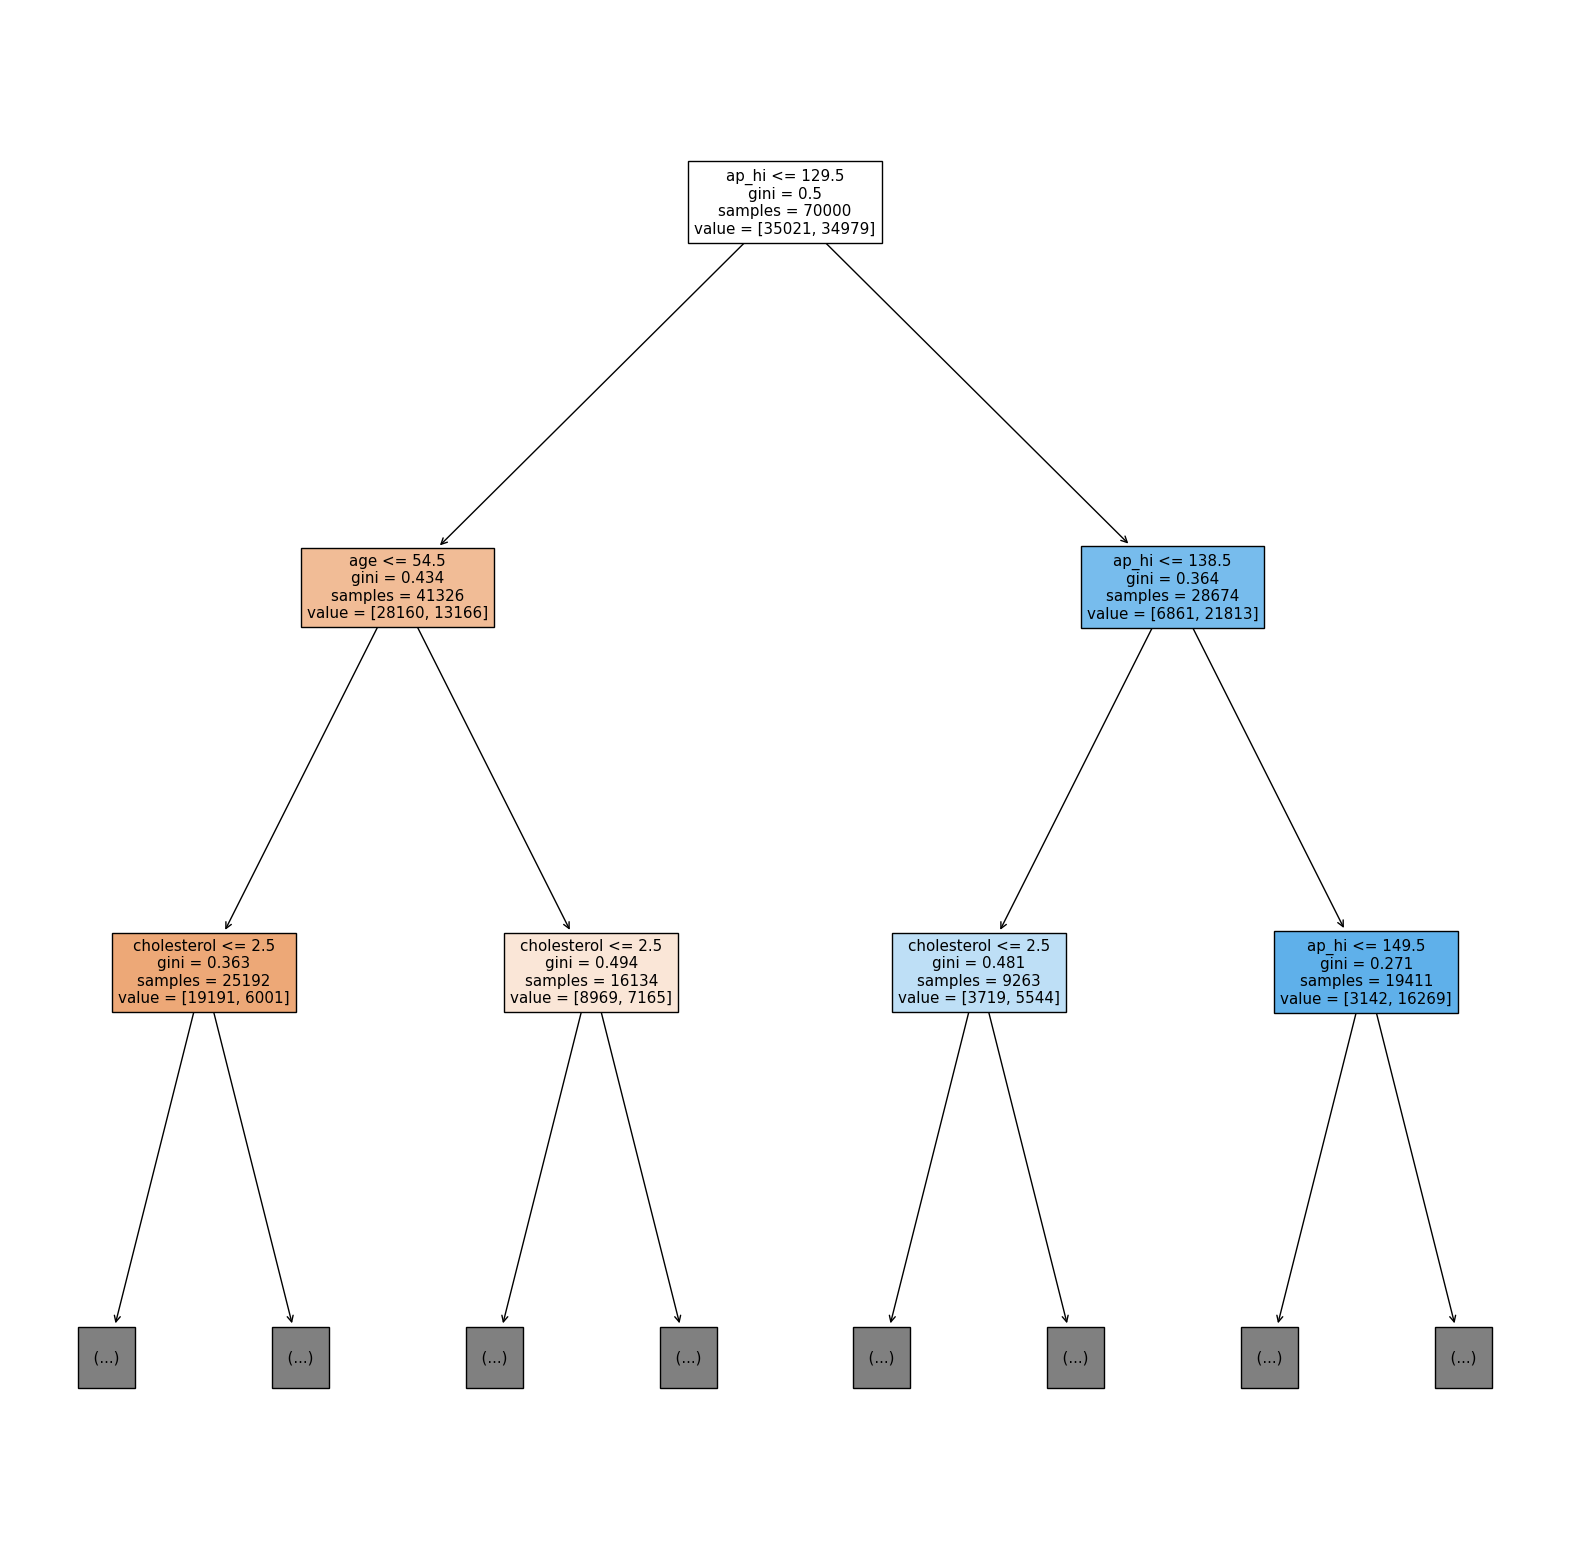

In [27]:
plt.figure(figsize=(20, 20))
plot_tree(tree_classifier, feature_names=full_features, max_depth=2, filled=True)
plt.show()


4.2.6. Если что-то не сошлось, посмотрите, в чем может быть проблема

Все сошлось

# 2. Дерево решений для регрессии

In [1]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
import pandas as pd
import matplotlib.pyplot as plt

### 1. Получение данных load_breat_cancer

Будем работать с набором данных для задачи регрессии `load_diabetes`, который можно получить из стандартных датасетов в `sklearn'e`.

После `load_diabetes()` возвращается словарь с данными (`data`), целевой переменной (`target`), названиями характеристик в данных (`feature_names`) и описанием данных (`DESCR`).

In [2]:
from sklearn.datasets import load_diabetes
import pandas as pd

data = load_diabetes()
data

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [3]:
X = data.data
features = data.feature_names
y = data.target

Из признаков (характеристик данных) и целевой переменной сформируем датафрейм, в качестве названий колонок возьмем названия признаков.

In [4]:
df = pd.DataFrame(X, columns=features)
df['target'] = y

df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


Разобьем выборку на две: обучающую и тестовую.

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df[features],
    df['target'],
    test_size=0.2,
    shuffle=True,
    random_state=3
)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((353, 10), (353,), (89, 10), (89,))

### 1.1. Обучение дерева решений

1. Инициализируйте дерево решений для задачи регрессии
2. Обучите его на обучающей выборке

In [6]:
from sklearn.tree import DecisionTreeRegressor

tree_regressor = DecisionTreeRegressor(random_state=1)

In [7]:
tree_regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=1)

### 1.2. Получение метрик качества
Узнаем, насколько дерево решений обучилось хорошо, для этого
1. Сделайте предсказания моделью для обучающей выборки
2. Сделайте предсказания моделью для тестовой выборки
3. Посчитайте метрику качества средне-квадратичная ошибка
4. Посчитайте метрику качества коэффициент детерминации

In [8]:
y_train_pred = tree_regressor.predict(X_train)
y_test_pred = tree_regressor.predict(X_test)

Сделайте вывод, насколько хорошо обучилась модель

In [9]:
from sklearn.metrics import mean_squared_error, r2_score

print(f'MSE[train] = {mean_squared_error(y_train, y_train_pred)}; MSE[test]= {mean_squared_error(y_test, y_test_pred)}')
print(f'R2[train] = {r2_score(y_train, y_train_pred)}; R2[test]= {r2_score(y_test, y_test_pred)}')

MSE[train] = 0.0; MSE[test]= 5897.134831460674
R2[train] = 1.0; R2[test]= -0.08909766517566808


### 1.3. Изменение метрики

Попробуйте поизменять известные параметры для того, чтобы метрика стала лучше.

In [10]:
tree_regressor = DecisionTreeRegressor(random_state=1, criterion="friedman_mse", max_depth=10, min_samples_leaf=50)
tree_regressor.fit(X_train, y_train)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=10,
                      min_samples_leaf=50, random_state=1)

In [11]:
y_train_pred = tree_regressor.predict(X_train)
y_test_pred = tree_regressor.predict(X_test)

In [12]:
from sklearn.metrics import mean_squared_error, r2_score

print(f'MSE[train] = {mean_squared_error(y_train, y_train_pred)}; MSE[test]= {mean_squared_error(y_test, y_test_pred)}')
print(f'R2[train] = {r2_score(y_train, y_train_pred)}; R2[test]= {r2_score(y_test, y_test_pred)}')

MSE[train] = 3525.351316258463; MSE[test]= 3748.0332373813903
R2[train] = 0.41726041636674993; R2[test]= 0.3078038124453397


### 2. Получение данных make_regression

Для второго примера возьмем самодельный набор данных для задачи регрессии `make_regression`, который можно получить из стандартных датасетов в `sklearn'e`.

Сгенерируем себе 100к объектов, которые описываются 20 признаками, из них 12 будут дейтсвительно полезными.

In [13]:
from sklearn.datasets import make_regression

X, y = make_regression(n_samples=100_000, n_features=20, n_informative=12, random_state=10)

In [14]:
X.shape, y.shape

((100000, 20), (100000,))

Разобьем выборку на две: обучающую и тестовую.

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    shuffle=True,
    random_state=3
)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((80000, 20), (80000,), (20000, 20), (20000,))

### 2.1. Обучение дерева решений

1. Инициализируйте дерево решений для задачи регрессии
2. Обучите его на обучающей выборке

In [16]:
tree_regressor = DecisionTreeRegressor(random_state=1, criterion="friedman_mse", max_depth=10, min_samples_leaf=10)
tree_regressor.fit(X_train, y_train)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=10,
                      min_samples_leaf=10, random_state=1)

### 2.2. Получение метрик качества
Узнаем, насколько дерево решений обучилось хорошо, для этого
1. Сделайте предсказания моделью для обучающей выборки
2. Сделайте предсказания моделью для тестовой выборки
3. Посчитайте метрику качества средне-квадратичная ошибка
4. Посчитайте метрику качества коэффициент детерминации

In [17]:
from sklearn.metrics import mean_squared_error, r2_score

y_train_pred = tree_regressor.predict(X_train)
y_test_pred = tree_regressor.predict(X_test)
print(f'MSE[train] = {mean_squared_error(y_train, y_train_pred)}; MSE[test]= {mean_squared_error(y_test, y_test_pred)}')
print(f'R2[train] = {r2_score(y_train, y_train_pred)}; R2[test]= {r2_score(y_test, y_test_pred)}')

MSE[train] = 12725.848652578617; MSE[test]= 17128.3901851413
R2[train] = 0.7645415788436455; R2[test]= 0.6827368496381083


Сделайте вывод, насколько хорошо обучилась модель

In [18]:
# Как видно из метрики R2 модель работает лучше чем просто подсчет среднего

### 2.3. Перебор гиперпараметров

Осуществите перебор параметров для получения лучших результатов (GridSearchCV, см. подход из п.0).

In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(random_state=1)

param_grid = {
    "criterion": ["squared_error", "friedman_mse"],
    "max_depth": [2, 5, 13, 21],
    "min_samples_leaf":  [2, 5, 13, 21]
}

grid = GridSearchCV(tree, param_grid, cv=5, verbose=1)

grid_search = grid.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


In [24]:
grid_search.best_params_

{'criterion': 'squared_error', 'max_depth': 21, 'min_samples_leaf': 13}

In [25]:
tree = grid_search.best_estimator_
y_pred_best = tree.predict(X_test)

In [26]:
from sklearn.metrics import mean_squared_error, r2_score

print(f'R2={r2_score(y_pred_best, y_test)}')
print(f'MSE={mean_squared_error(y_pred_best, y_test)}')

R2=0.6990200245255985
MSE=13918.97047843449
